In [1]:
import tensorflow
import os
import numpy as np
import cv2

In [2]:
import cv2
img = cv2.imread("train/4/Training_98123.jpg")

In [3]:
import matplotlib.pyplot as plt

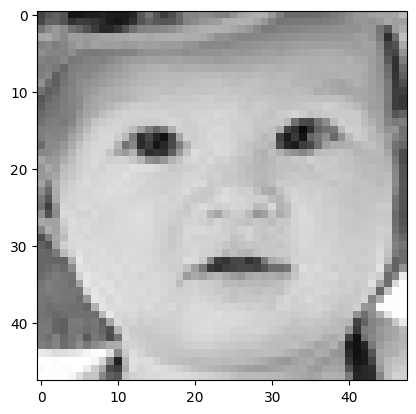

In [4]:
import matplotlib.pyplot as plt
plt.imshow(img)

In [5]:
img.shape

(48, 48, 3)

In [6]:
##print(img_array)

In [7]:
Datadirectory = "train/"  ##training data set

In [8]:
Classes = ["0","1","2","3","4","5","6"]  ## list of classes => exact name of the folder

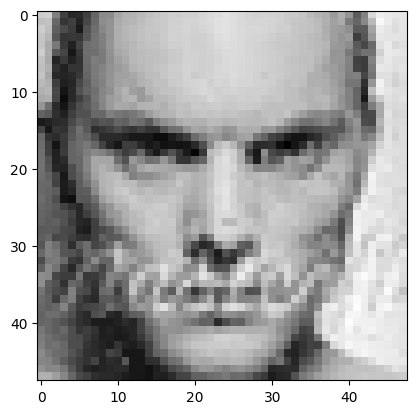

In [9]:
for category in Classes:
    path = os.path.join(Datadirectory, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img))
        ##backtrog = cv2.cvtcolor(img_array, cv2.COLOR_GRAY2RGB)
        plt.imshow(cv2.cvtColor(img_array,cv2.COLOR_BGR2RGB))
        plt.show()
        break
    break

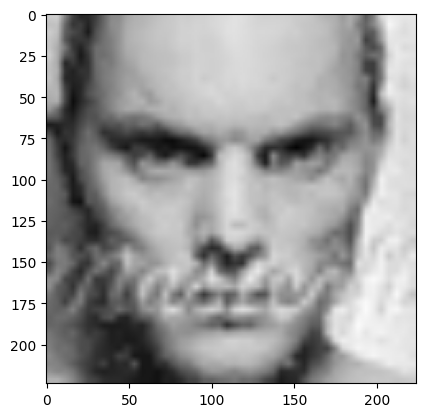

In [10]:
img_size= 224
new_array= cv2.resize(img_array, (img_size,img_size))
plt.imshow(cv2.cvtColor(new_array, cv2.COLOR_BGR2RGB))
plt.show()
##print(len(new_array))

In [11]:
new_array.shape

(224, 224, 3)

##read all the image and convert them to array

In [12]:
training_data = [] ##data array

def create_training_data():
    for category in Classes:
        path = os.path.join(Datadirectory, category)
        class_num = Classes.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img))
                new_array= cv2.resize(img_array, (img_size,img_size))
                training_data.append([new_array,class_num])
            except Exception as e:
                pass

In [13]:
create_training_data()

In [14]:
print(len(training_data))

6353


In [15]:

##temp = np.array(training_data)

In [16]:
##temp.shape

In [17]:
import random

random.shuffle(training_data)

In [18]:
x = []    ##data/feature
y = []    ##lable

for feature,label in training_data:
    x.append(feature)
    y.append(label)
    
  
x = np.array(x).reshape(-1,img_size,img_size,3)

In [19]:
x.shape

(6353, 224, 224, 3)

In [20]:
x=x/255.0

In [21]:
type(y)

list

In [22]:
y[0]

4

In [23]:
y=np.array(y)

In [24]:
y.shape

(6353,)

deep learning model for training - transfer learning

In [25]:
import tensorflow as tf
from tensorflow import keras
import keras

from keras import layers

In [26]:
model = tf.keras.applications.MobileNetV2()

In [27]:
model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 112, 112, 32)         864       ['input_1[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 112, 112, 32)         128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 112, 112, 32)         0         ['bn_Conv1[

##transfer learning - tuning, weight will start from last check points

In [28]:
base_input = model.layers[0].input

In [29]:
base_output = model.layers[-2].output

In [30]:
base_output

<KerasTensor: shape=(None, 1280) dtype=float32 (created by layer 'global_average_pooling2d')>

In [31]:
final_output = layers.Dense(128)(base_output)
final_output = layers.Activation('relu')(final_output)
final_output = layers.Dense(64)(final_output)
final_output = layers.Activation('relu')(final_output)
final_output = layers.Dense(7, activation='softmax')(final_output)

In [32]:
final_output

<KerasTensor: shape=(None, 7) dtype=float32 (created by layer 'dense_2')>

In [33]:
new_model = keras.Model(inputs = base_input, outputs = final_output)

In [34]:
new_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 112, 112, 32)         864       ['input_1[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 112, 112, 32)         128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 112, 112, 32)         0         ['bn_Conv1[0][0]']        

In [35]:
new_model.compile(loss = "sparse_categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])

In [36]:
##new_model.fit(x,y, epochs= 5)

In [37]:
##new_model.save('new_model_64p35.h5')

In [38]:
new_model = tf.keras.models.load_model('new_model_64p35.h5')

In [39]:
frame = cv2.imread("surprised_man.jpg")

In [40]:
frame.shape

(148, 195, 3)

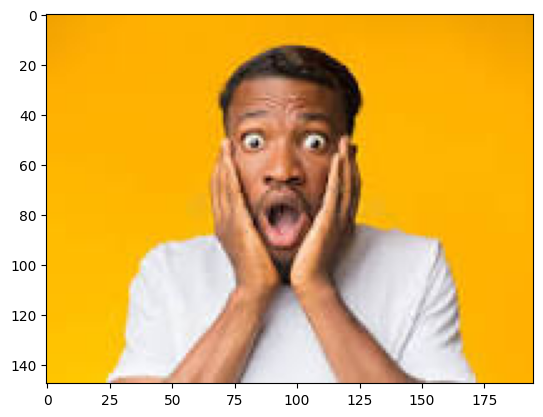

In [41]:
plt.imshow(cv2.cvtColor(frame,cv2.COLOR_BGR2RGB))

In [42]:
## we need face detection algorithm (gray scale)

In [43]:
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [44]:
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

In [45]:
gray.shape

(148, 195)

In [46]:
faces = faceCascade.detectMultiScale(gray,1.1,4)
for (x,y,w,h) in faces:
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = frame[y:y+h, x:x+w]
    cv2.rectangle(frame, (x, y), (x+w, y+h), (255,255,0), 2)   ##bgr
    facess = faceCascade.detectMultiScale(roi_gray)
    if len(facess) == 0:
        print("face not detected")
    else:
        for (ex,ey,ew,eh) in facess:
            face_roi =  roi_color[ey: ey+eh, ex: ex+ew]  ##roi -> reason of intrest

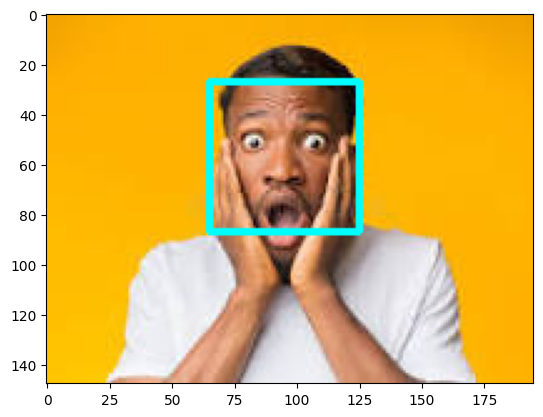

In [47]:
plt.imshow(cv2.cvtColor(frame,cv2.COLOR_BGR2RGB))

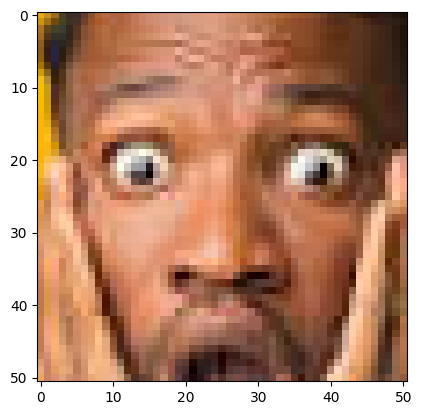

In [48]:
plt.imshow(cv2.cvtColor(face_roi,cv2.COLOR_BGR2RGB))

In [49]:
final_image = cv2.resize(face_roi, (224,224))
final_image = np.expand_dims(final_image, axis = 0)
final_image = final_image/255.0

In [50]:
predictions = new_model.predict(final_image)

1/1 [==============================] - 1s 1s/step


In [51]:
predictions[0]

array([3.3194745e-08, 3.4569025e-10, 1.6679388e-02, 3.3780786e-01,
       3.1831863e-03, 1.8889805e-06, 6.4232755e-01], dtype=float32)

In [52]:
np.argmax(predictions)

6

TESTING OF THE DATA

225/225 [==============================] - 104s 461ms/step
Model Accuracy: 30.31%


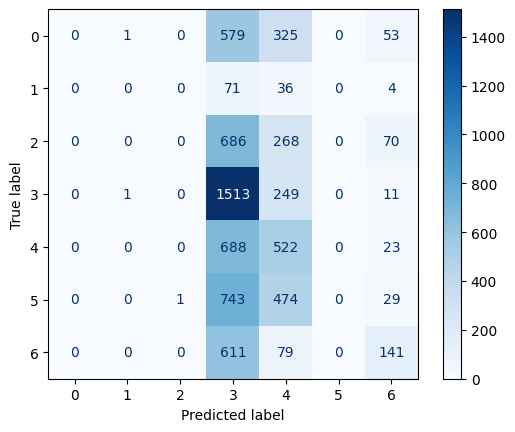

In [ ]:
# Evaluation Code
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

# Load the test dataset
test_directory = "E:/projectpratham/test"
test_data = []
test_labels = []

for category in Classes:
    path = os.path.join(test_directory, category)
    class_num = Classes.index(category)
    for img in os.listdir(path):
        try:
            img_array = cv2.imread(os.path.join(path, img))
            new_array = cv2.resize(img_array, (img_size, img_size))
            test_data.append(new_array)
            test_labels.append(class_num)
        except Exception as e:
            pass

# Prepare the test data
x_test = np.array(test_data).reshape(-1, img_size, img_size, 3) / 255.0
y_test = np.array(test_labels)

# Make predictions on the test set
y_pred = new_model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Calculate accuracy
accuracy = np.sum(y_pred_classes == y_test) / len(y_test)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

# Visualize the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=Classes)
disp.plot(cmap=plt.cm.Blues)
plt.show()


REAL TIME VIDEO DEMO

In [2]:
import cv2
path = "haarcascade_frontalface_default.xml"
font_scale = 1.5
font = cv2.FONT_HERSHEY_PLAIN

## set the rctangle background to white
rectangle_bgr = (255,255,255)
## make a black image
img = np.zeros((500, 500))
## set some text
text = "some text in a box !"
## get the width and the hight of the text box
(text_width, text_hight) = cv2.getTextSize(text, font, fontScale=font_scale, thickness=1)[0]
## set the text start position
text_offset_x = 10
text_offset_y = img.shape[0] - 25
##make the coords of the box with a small padding of two pixels
box_coords = ((text_offset_x, text_offset_y), (text_offset_x + text_width + 2, text_offset_y - text_hight - 2))
cv2.rectangle(img, box_coords[0], box_coords [1], rectangle_bgr, cv2.FILLED)
cv2.putText(img, text, (text_offset_x, text_offset_y), font, fontScale=font_scale, color=(0, 0, 0), thickness=1)

cap =  cv2.VideoCapture(1)
## check if the webcam is opend correctly
if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot open webcam")

while True:
    ret, frame = cap.read()
    faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = faceCascade.detectMultiScale(gray, 1.1,4)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = frame[y:y+h, x:x+w]
        cv2.rectangle(frame, (x, y), (x+w, y+h), (255,255,0), 2)   ##bgr
        facess = faceCascade.detectMultiScale(roi_gray)
        if len(facess) == 0:
            print("face not detected")
        else:
            for (ex,ey,ew,eh) in facess:
                face_roi =  roi_color[ey: ey+eh, ex: ex+ew]  ##roi -> reason of intrest
    
    final_image = cv2.resize(face_roi, (224,224))
    final_image = np.expand_dims(final_image, axis = 0)
    final_image = final_image/255.0
    
    font  = cv2.FONT_HERSHEY_SIMPLEX
    
    predictions= new_model.predict(final_image)
    
    font_scale = 1.5
    font = cv2.FONT_HERSHEY_PLAIN
    
    if (np.argmax(predictions)==0):
        status = "Angry"
        
        x1,y1,w1,h1 = 0,0,175,75
        ## Draw black background rectangle
        cv2.rectangle(frame, (x1, x1), (x1+w1, y1+h1),(0,0,0), -1)
        ## add text
        cv2.putText(frame, status, (x1 + int(w1/10),y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 2)
        
        cv2.putText(frame, status, (100, 150), font, 3, (0,0,255), 2, cv2.LINE_4)
        
        cv2.rectangle(frame,  (x,y), (x+w, y+h), (0,0,255))
        
    elif (np.argmax(predictions)==1):
        status = "Disgust"
        
        x1,y1,w1,h1 = 0,0,175,75
        ## Draw black background rectangle
        cv2.rectangle(frame, (x1, x1), (x1+w1, y1+h1),(0,0,0), -1)
        ## add text
        cv2.putText(frame, status, (x1 + int(w1/10),y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 2)
        
        cv2.putText(frame, status, (100, 150), font, 3, (0,0,255), 2, cv2.LINE_4)
        
        cv2.rectangle(frame,  (x,y), (x+w, y+h), (0,0,255))
        
    elif (np.argmax(predictions)==2):
        status = "Fear"
        
        x1,y1,w1,h1 = 0,0,175,75
        ## Draw black background rectangle
        cv2.rectangle(frame, (x1, x1), (x1+w1, y1+h1),(0,0,0), -1)
        ## add text
        cv2.putText(frame, status, (x1 + int(w1/10),y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 2)
        
        cv2.putText(frame, status, (100, 150), font, 3, (0,0,255), 2, cv2.LINE_4)
        
        cv2.rectangle(frame,  (x,y), (x+w, y+h), (0,0,255))
        
    elif (np.argmax(predictions)==3):
        status = "Happy"
        
        x1,y1,w1,h1 = 0,0,175,75
        ## Draw black background rectangle
        cv2.rectangle(frame, (x1, x1), (x1+w1, y1+h1),(0,0,0), -1)
        ## add text
        cv2.putText(frame, status, (x1 + int(w1/10),y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 2)
        
        cv2.putText(frame, status, (100, 150), font, 3, (0,0,255), 2, cv2.LINE_4)
        
        cv2.rectangle(frame,  (x,y), (x+w, y+h), (0,0,255))
        
    if (np.argmax(predictions)==4):
        status = "Sad"
        
        x1,y1,w1,h1 = 0,0,175,75
        ## Draw black background rectangle
        cv2.rectangle(frame, (x1, x1), (x1+w1, y1+h1),(0,0,0), -1)
        ## add text
        cv2.putText(frame, status, (x1 + int(w1/10),y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 2)
        
        cv2.putText(frame, status, (100, 150), font, 3, (0,0,255), 2, cv2.LINE_4)
        
        cv2.rectangle(frame,  (x,y), (x+w, y+h), (0,0,255))
        
    elif (np.argmax(predictions)==5):
        status = "Surprise"
        
        x1,y1,w1,h1 = 0,0,175,75
        ## Draw black background rectangle
        cv2.rectangle(frame, (x1, x1), (x1+w1, y1+h1),(0,0,0), -1)
        ## add text
        cv2.putText(frame, status, (x1 + int(w1/10),y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 2)
        
        cv2.putText(frame, status, (100, 150), font, 3, (0,0,255), 2, cv2.LINE_4)
        
        cv2.rectangle(frame,  (x,y), (x+w, y+h), (0,0,255))
        
    elif (np.argmax(predictions)==6):
        status = "Neutral"
        
        x1,y1,w1,h1 = 0,0,175,75
        ## Draw black background rectangle
        cv2.rectangle(frame, (x1, x1), (x1+w1, y1+h1),(0,0,0), -1)
        ## add text
        cv2.putText(frame, status, (x1 + int(w1/10),y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 2)
        
        cv2.putText(frame, status, (100, 150), font, 3, (0,0,255), 2, cv2.LINE_4)
        
        cv2.rectangle(frame,  (x,y), (x+w, y+h), (0,0,255))
        
        
        
        
        
    cv2.imshow('Face Emotion Recognition', frame)
    

    if cv2.waitKey(2) & 0xFF == ord('q'):
      break
    
    
    



NameError: name 'np' is not defined

In [1]:
cap.release()
cv2.destroyAllWindows()


NameError: name 'cap' is not defined